In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_peru = pd.read_excel(r'alldatasets.xlsx',sheet_name='Peru')

In [3]:
df_peru.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,PE018001,Peru,154.000000,0.0,12.0,-0.239376,5.0,NaN,7.0,0,98,5,0.558814,5,1,700,207.403626
1,PE018002,Peru,163.000000,0.0,15.5,-0.244915,10.0,4.0,12.0,1,94,4,0.615497,2,1,0,0.000000
2,PE018004,Peru,157.000000,0.0,7.0,-0.143035,15.0,NaN,12.0,0,90,5,0.428947,5,1,400,118.516357
3,PE018005,Peru,156.500000,0.0,7.0,0.375651,30.0,0.0,9.0,0,91,4,0.337719,5,1,700,207.403626
4,PE018006,Peru,160.100006,0.0,12.0,0.435034,15.0,10.0,12.0,0,93,4,0.537803,5,1,1400,414.807251


In [4]:
df_peru.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

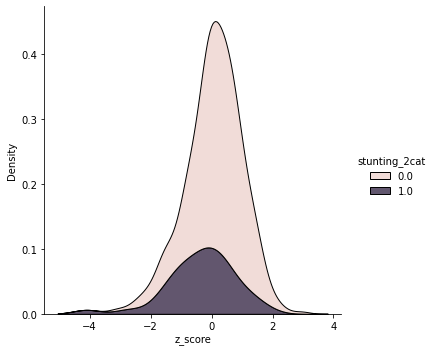

In [6]:
import seaborn as sns
sns.displot(df_peru, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_peru[['z_score']]
X = df_peru[['stunting_2cat']]

In [8]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_peru, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 30 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.161,0.053,0.059,0.256,0.001,0.001,4737.0,4698.0,4744.0,4105.0,1.0
stunting_2cat,-0.495,0.101,-0.680,-0.301,0.001,0.001,4988.0,4938.0,4994.0,4664.0,1.0
sd,0.951,0.032,0.887,1.009,0.000,0.000,6273.0,6266.0,6238.0,3923.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

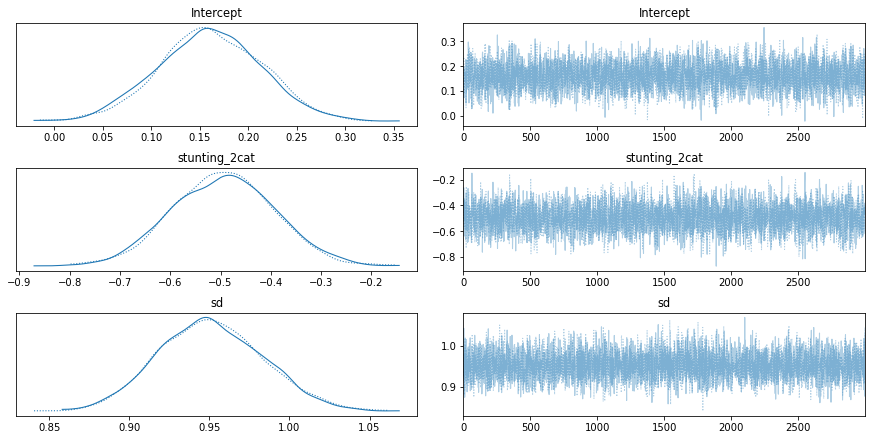

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_peru['z_score']
X = df_peru[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1),
        'agegapr1': pm.Normal.dist(mu=1, sigma=1),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=1),
        'chsexr1': pm.Normal.dist(mu=1, sigma=1),
        'agemonr1': pm.Normal.dist(mu=1, sigma=1),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=1),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=1)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_peru, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 1000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 91 seconds.


In [21]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-2.177,1.016,-4.093,-0.269,0.013,0.009,5947.0,5801.0,5953.0,6089.0,1.0
stunting_2cat,-0.107,0.106,-0.303,0.096,0.001,0.001,10064.0,6832.0,10064.0,7538.0,1.0
agegapr1,0.010,0.011,-0.010,0.030,0.000,0.000,10447.0,7131.0,10448.0,7596.0,1.0
momeduyrsr1,0.059,0.013,0.035,0.083,0.000,0.000,9747.0,9592.0,9740.0,7674.0,1.0
chsexr1,-0.005,0.090,-0.175,0.161,0.001,0.001,12857.0,4086.0,12844.0,6677.0,1.0
agemonr1,0.016,0.011,-0.003,0.037,0.000,0.000,6107.0,5857.0,6107.0,6179.0,1.0
wi_newr1,1.446,0.229,1.013,1.878,0.002,0.002,10245.0,10245.0,10284.0,7399.0,1.0
hhsizer1,-0.089,0.026,-0.139,-0.043,0.000,0.000,11489.0,10668.0,11509.0,7335.0,1.0
sd,0.816,0.032,0.757,0.877,0.000,0.000,11634.0,11557.0,11715.0,7478.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

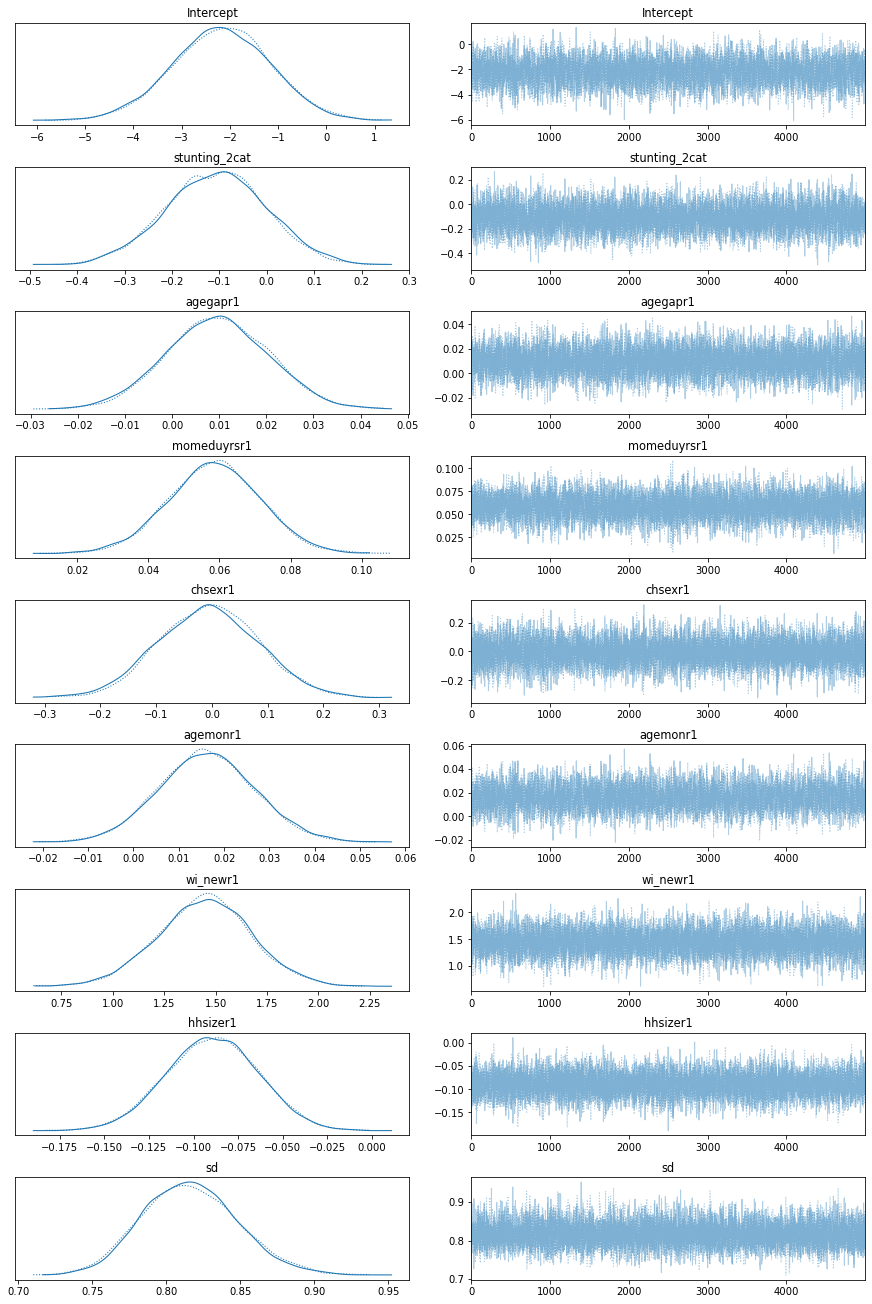

In [22]:
az.plot_trace(normal_trace)

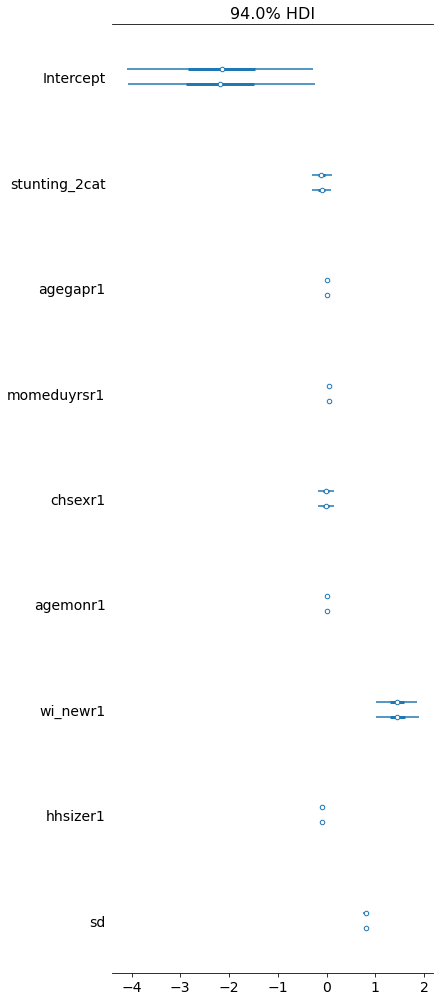

In [23]:
az.plot_forest(normal_trace);